## Task 5
Develop a model that can accurately recognize food items from images and estimate their calorie content, enabling users to track their dietary intake and make informed food choices

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
%cd /kaggle/input/food-101/

/kaggle/input/food-101


In [ ]:
!head 'food-101/food-101/meta/train.txt'

apple_pie/1005649
apple_pie/1014775
apple_pie/1026328
apple_pie/1028787
apple_pie/1043283
apple_pie/1050519
apple_pie/1057749
apple_pie/1057810
apple_pie/1072416
apple_pie/1074856


In [ ]:
train_df = pd.read_csv('food-101/food-101/meta/train.txt', header = None, names=['path'])
train_df.head()

,path
0,apple_pie/1005649
1,apple_pie/1014775
2,apple_pie/1026328
3,apple_pie/1028787
4,apple_pie/1043283


In [ ]:
len(train_df)

75750

In [ ]:
test_df = pd.read_csv('food-101/food-101/meta/test.txt', header = None, names=['path'])
test_df.head()

,path
0,apple_pie/1011328
1,apple_pie/101251
2,apple_pie/1034399
3,apple_pie/103801
4,apple_pie/1038694


In [ ]:
def spliter(data, class_or_id='id'):
    if class_or_id.upper() == 'CLASS':
        output = data.split('/')[0]

    else:
        output = data.split('/')[-1]
    return output

In [ ]:
train_df['label'] = train_df['path'].map(lambda x: spliter(data = x, class_or_id = 'Class'))

In [ ]:
train_df.head()

,path,label
0,apple_pie/1005649,apple_pie
1,apple_pie/1014775,apple_pie
2,apple_pie/1026328,apple_pie
3,apple_pie/1028787,apple_pie
4,apple_pie/1043283,apple_pie


In [ ]:
train_df['idx'] = train_df['path'].map(lambda x: spliter(x))

In [ ]:
train_df.head()

,path,label,idx
0,apple_pie/1005649,apple_pie,1005649
1,apple_pie/1014775,apple_pie,1014775
2,apple_pie/1026328,apple_pie,1026328
3,apple_pie/1028787,apple_pie,1028787
4,apple_pie/1043283,apple_pie,1043283


In [ ]:
test_df['label'] = test_df['path'].map(lambda x: spliter(x, 'class'))
test_df['idx'] = test_df['path'].map(lambda x: spliter(x))

In [ ]:
test_df.head()

,path,label,idx
0,apple_pie/1011328,apple_pie,1011328
1,apple_pie/101251,apple_pie,101251
2,apple_pie/1034399,apple_pie,1034399
3,apple_pie/103801,apple_pie,103801
4,apple_pie/1038694,apple_pie,1038694


In [ ]:
mini_20 = train_df['label'].unique()[:20]

In [ ]:
mini_20

array(['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio',
       'beef_tartare', 'beet_salad', 'beignets', 'bibimbap',
       'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad',
       'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheesecake',
       'cheese_plate', 'chicken_curry', 'chicken_quesadilla'],
      dtype=object)

In [ ]:
list_ = []
for l in mini_20:
    list_.append(l.upper())

In [ ]:
mini_20 = [f.upper() for f in mini_20]

In [ ]:
def prepare_data(label):
    if label.upper() in mini_20:
        return label
    else:
        return 'big_class'

In [ ]:
train_df['label'] = train_df['label'].map(lambda x: prepare_data(x))
test_df['label'] = test_df['label'].map(lambda x: prepare_data(x))

In [ ]:
train_df['label'].unique()

array(['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio',
       'beef_tartare', 'beet_salad', 'beignets', 'bibimbap',
       'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad',
       'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheesecake',
       'cheese_plate', 'chicken_curry', 'chicken_quesadilla', 'big_class'],
      dtype=object)

In [ ]:
def add_exact_path(path):
    return 'food-101/food-101/images/'+path+'.jpg'

In [ ]:
train_df['path'] = train_df[['path']].apply(add_exact_path, axis=1)
test_df['path'] = test_df[['path']].apply(add_exact_path, axis=1)

In [ ]:
train_df.head()

,path,label,idx
0,food-101/food-101/images/apple_pie/1005649.jpg,apple_pie,1005649
1,food-101/food-101/images/apple_pie/1014775.jpg,apple_pie,1014775
2,food-101/food-101/images/apple_pie/1026328.jpg,apple_pie,1026328
3,food-101/food-101/images/apple_pie/1028787.jpg,apple_pie,1028787
4,food-101/food-101/images/apple_pie/1043283.jpg,apple_pie,1043283


In [ ]:
from matplotlib import pyplot as plt
img = plt.imread(test_df['path'].iloc[0])
# plt.imshow(img)
img = img/255.

In [ ]:
img.shape

(512, 512, 3)

In [ ]:
train_df.iloc[0]

path     food-101/food-101/images/apple_pie/1005649.jpg
label                                         apple_pie
idx                                             1005649
Name: 0, dtype: object

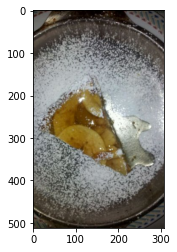

In [ ]:
from matplotlib import pyplot as plt
img = plt.imread(train_df['path'].iloc[0])
plt.imshow(img)

In [ ]:
img.shape

(512, 308, 3)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True
    )
test_gen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_gen = datagen.flow_from_dataframe(dataframe = train_df, directory=None, x_col='path', y_col='label',
    weight_col=None, target_size=(256, 256), color_mode='rgb', #subset='training',
    classes=None, class_mode='categorical', batch_size=32, shuffle=True)
# val_gen = datagen.flow_from_dataframe(dataframe = train_df, directory=None, x_col='path', y_col='label',
#     weight_col=None, target_size=(256, 256), color_mode='rgb', subset='validation',
#     classes=None, class_mode='categorical', batch_size=32, shuffle=True)

Found 75750 validated image filenames belonging to 21 classes.


In [ ]:
test_gen = test_gen.flow_from_dataframe(dataframe = test_df, directory=None, x_col='path', y_col='label',
    weight_col=None, target_size=(256, 256), color_mode='rgb',
    classes=None, class_mode='categorical', batch_size=32, shuffle=True)

Found 25250 validated image filenames belonging to 21 classes.


In [ ]:
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras import regularizers
from tensorflow.keras.applications import efficientnet
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.applications.xception import Xception

inception = Xception(weights='imagenet', include_top=False)
x = inception.output
x = GlobalAveragePooling2D()(x)
x = Dense(256,activation='relu')(x)
# x = Dropout(0.4)(x)
x = Dense(128,activation='relu')(x)
x = Dropout(0.2)(x)

predictions = Dense(21, activation='softmax')(x)

model = Model(inputs=inception.input, outputs=predictions)
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

83697664/83683744 [==============================] - 0s 0us/step


/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
history = model.fit_generator(train_gen,
                    steps_per_epoch = len(train_gen) // 32,
#                     validation_data=val_gen,
#                     validation_steps=len(val_gen) // 32,
                    epochs=100,
                    verbose=1)

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
74/74 [==============================] - 70s 782ms/step - loss: 1.3785 - accuracy: 0.7694
Epoch 2/100
74/74 [==============================] - 57s 769ms/step - loss: 1.0154 - accuracy: 0.8041
Epoch 3/100
74/74 [==============================] - 57s 770ms/step - loss: 0.9506 - accuracy: 0.8053
Epoch 4/100
74/74 [==============================] - 58s 771ms/step - loss: 0.8833 - accuracy: 0.8032
Epoch 5/100
74/74 [==============================] - 56s 756ms/step - loss: 0.7723 - accuracy: 0.8171
Epoch 6/100
74/74 [==============================] - 56s 751ms/step - loss: 0.7088 - accuracy: 0.8222
Epoch 7/100
74/74 [==============================] - 56s 756ms/step - loss: 0.6950 - accuracy: 0.8285
Epoch 8/100
74/74 [==============================] - 55s 742ms/step - loss: 0.6203 - accuracy: 0.8353
Epoch 9/100
74/74 [==============================] - 56s 745ms/step - loss: 0.6173 - accuracy: 0.8399
Epoch 10/100
74/74 [==============================] - 54s 728ms/step - loss: 0.556

In [ ]:
results = model.evaluate(test_gen, batch_size=32)
print(results)

790/790 [==============================] - 322s 407ms/step - loss: 0.3390 - accuracy: 0.9141
[0.3390255570411682, 0.9140990376472473]


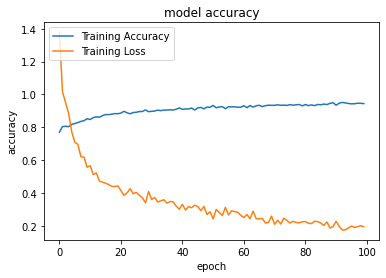

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training Accuracy', 'Training Loss'], loc='upper left')
plt.show()